In [1]:
%store -r df


In [2]:
import pandas as pd

In [3]:
df.columns

Index(['bodyType', 'brand', 'color', 'description', 'engineDisplacement',
       'enginePower', 'fuelType', 'mileage', 'model_name', 'numberOfDoors',
       'sell_id', 'vehicleTransmission', 'Владельцы', 'Владение', 'ПТС',
       'Привод', 'Руль', 'price', 'model_product_time', 'car_age'],
      dtype='object')

In [4]:
preX = pd.concat(
[df[['brand','sell_id','price','engineDisplacement', 'enginePower','mileage','car_age', 'model_product_time']] ,
pd.get_dummies(df.bodyType,prefix='bodyType'),
pd.get_dummies(df.fuelType,prefix='fuelType'),
pd.get_dummies(df.vehicleTransmission,prefix='vehicleTransmission'),
pd.get_dummies(df.Привод,prefix='Привод'),
pd.get_dummies(df.Владельцы,prefix='Владельцы'),
pd.get_dummies(df.Владение,prefix='Владение'),
pd.get_dummies(df.color,prefix='color'),
pd.get_dummies(df.ПТС,prefix='ПТС'),
pd.get_dummies(df.Руль,prefix='Руль'),
pd.get_dummies(df.numberOfDoors,prefix='numberOfDoors'),],axis=1)

preX.sample(5)

,brand,sell_id,price,engineDisplacement,enginePower,mileage,car_age,model_product_time,bodyType_внедорожник,bodyType_компактвэн,...,color_синий,color_чёрный,ПТС_DUPLICATE,ПТС_ORIGINAL,Руль_LEFT,Руль_RIGHT,numberOfDoors_2.0,numberOfDoors_3.0,numberOfDoors_4.0,numberOfDoors_5.0
10740,BMW,1092744136,-1.0,3.0,381,170000,8.8,0.0,1,0,...,0,1,0,1,1,0,0,0,0,1
23760,VOLKSWAGEN,1101206683,-1.0,1.4,150,144000,8.8,1.0,1,0,...,0,0,0,1,1,0,0,0,0,1
63726,HYUNDAI,-1,972000.0,1.6,123,0,0.8,0.0,0,0,...,0,0,0,1,1,0,0,0,1,0
106765,VOLKSWAGEN,-1,495000.0,1.6,105,130000,6.8,5.0,0,0,...,0,1,0,1,1,0,0,0,1,0
31696,MERCEDES,1101347078,-1.0,1.8,204,171000,8.8,1.0,0,0,...,0,0,0,1,1,0,0,0,1,0


In [5]:
test = preX[preX.price==-1]
train = preX[preX.price!=-1]

In [6]:
Xy = train.drop(['brand','sell_id'],axis='columns').reset_index(drop=True)


SKODA = train[train.brand == 'SKODA'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
AUDI = train[train.brand == 'AUDI'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
HONDA = train[train.brand == 'HONDA'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
VOLVO = train[train.brand == 'VOLVO'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
BMW = train[train.brand == 'BMW'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
NISSAN = train[train.brand == 'NISSAN'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
INFINITI = train[train.brand == 'INFINITI'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
MERCEDES = train[train.brand == 'MERCEDES'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
TOYOTA = train[train.brand == 'TOYOTA'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
LEXUS = train[train.brand == 'LEXUS'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
VOLKSWAGEN = train[train.brand == 'VOLKSWAGEN'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)
MITSUBISHI = train[train.brand == 'MITSUBISHI'].drop(['brand','sell_id'],axis='columns').reset_index(drop=True)

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    Xy.drop(['price'],axis="columns"), Xy.price, test_size=0.1, shuffle=True, random_state=42)

In [8]:
X_train

,engineDisplacement,enginePower,mileage,car_age,model_product_time,bodyType_внедорожник,bodyType_компактвэн,bodyType_купе,bodyType_лифтбек,bodyType_минивэн,...,color_синий,color_чёрный,ПТС_DUPLICATE,ПТС_ORIGINAL,Руль_LEFT,Руль_RIGHT,numberOfDoors_2.0,numberOfDoors_3.0,numberOfDoors_4.0,numberOfDoors_5.0
77656,4.4,339,129000,5.8,3.0,1,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1
32490,1.6,129,123124,8.8,0.0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
38668,2.0,150,171240,15.8,2.0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,1,0
8445,2.0,177,203000,11.8,3.0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
78466,2.0,122,200000,34.8,4.0,0,0,0,0,0,...,1,0,0,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,3.0,272,280000,13.8,0.0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,1,0
54886,1.4,75,198000,12.8,6.0,0,1,0,0,0,...,0,0,0,1,1,0,0,0,0,1
76820,2.2,105,125000,14.8,0.0,1,0,0,0,0,...,0,0,0,1,1,0,0,0,0,1
860,2.4,170,260000,17.8,3.0,0,0,0,0,0,...,0,1,0,1,1,0,0,0,0,1


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
regr = RandomForestRegressor(max_depth=5, random_state=0)

regr.fit(X_train, np.log(y_train))

(mape(y_test, regr.predict(X_test)))*100

In [85]:
model = CatBoostRegressor(iterations = 3000,
                          random_seed = 42,
                          eval_metric='MAPE',
                          custom_metric=['R2', 'MAE'],
                          silent=True,
                         )
model.fit(X_train.values, np.log(y_train.values),
         #cat_features=cat_features_ids,
         eval_set=(X_test.values, np.log(y_test.values)),
         verbose_eval=0,
         use_best_model=True,
         #plot=True
         )


In [9]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred-y_true)/y_true))*100

In [122]:
from sklearn.preprocessing import StandardScaler

StandardScaler(SKODA)

TypeError: StandardScaler.__init__() takes 1 positional argument but 2 were given

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    SKODA.drop(['price'],axis="columns"), SKODA.price, test_size=0.2, shuffle=True, random_state=42)

In [136]:
from sklearn import neighbors
knn = neighbors.KNeighborsRegressor(n_neighbors=3)
knn.fit(X_train, y_train)
(mape(y_test, knn.predict(X_test)))*100

43.72718254541138

In [149]:
from sklearn.svm import SVR
regr = make_pipeline(StandardScaler(), SVR(kernel="poly", C=100, gamma="auto", 
                                           degree=2, epsilon=0.1, coef0=1))
regr.fit(X_train, np.log(y_train))
(mape(y_test, np.exp(regr.predict(X_test))))*100

14.491012440477355

In [148]:
svr_rbf = SVR(kernel="rbf", C=1000, gamma=0.1, epsilon=0.2)
svr_rbf.fit(X_train, np.log(y_train))
(mape(y_test, np.exp(regr.predict(X_test))))*100

14.491012440477355

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    Xy[['car_age','enginePower','mileage']], Xy.price, test_size=0.1, shuffle=True, random_state=42)

from sklearn.svm import SVR
regr = SVR(kernel="poly", C=100, gamma="auto", degree=2, epsilon=0.1, coef0=1)
regr.fit(X_train, np.log(y_train))
(mape(y_test, np.exp(regr.predict(X_test))))*100

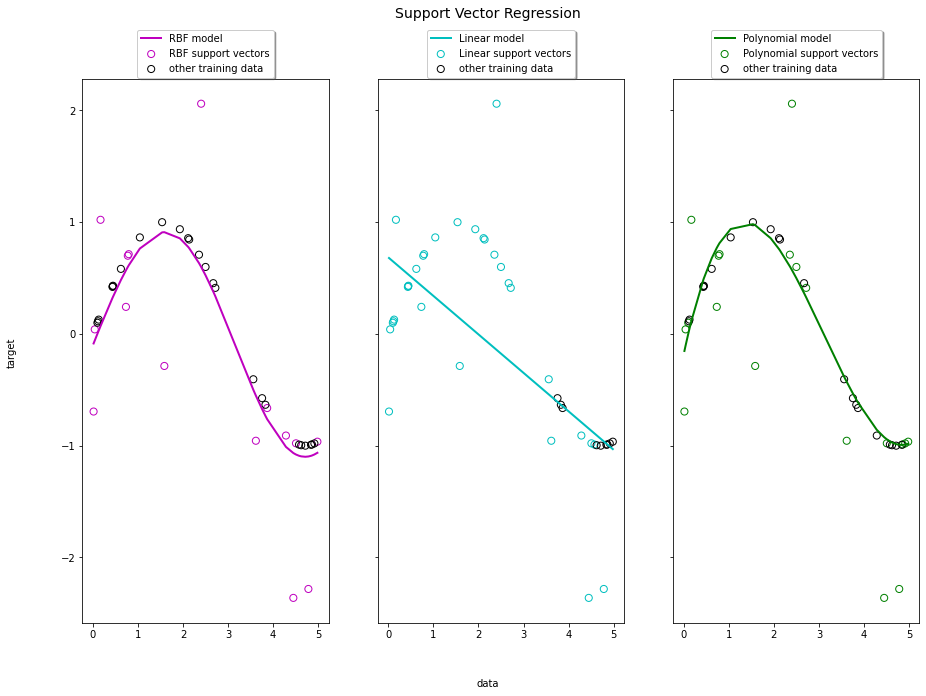

In [17]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_lin = SVR(kernel="linear", C=100, gamma="auto")
svr_poly = SVR(kernel="poly", C=100, gamma="auto", degree=3, epsilon=0.1, coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ["RBF", "Linear", "Polynomial"]
model_color = ["m", "c", "g"]

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

fig.text(0.5, 0.04, "data", ha="center", va="center")
fig.text(0.06, 0.5, "target", ha="center", va="center", rotation="vertical")
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

In [20]:
fig, axes = plt(sharey=True)
axes[ix].plot(
        X,
        svr.fit(X, y).predict(X),
        color=model_color[ix],
        lw=lw,
        label="{} model".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[svr.support_],
        y[svr.support_],
        facecolor="none",
        edgecolor=model_color[ix],
        s=50,
        label="{} support vectors".format(kernel_label[ix]),
    )
    axes[ix].scatter(
        X[np.setdiff1d(np.arange(len(X)), svr.support_)],
        y[np.setdiff1d(np.arange(len(X)), svr.support_)],
        facecolor="none",
        edgecolor="k",
        s=50,
        label="other training data",
    )
    axes[ix].legend(
        loc="upper center",
        bbox_to_anchor=(0.5, 1.1),
        ncol=1,
        fancybox=True,
        shadow=True,
    )

IndentationError: unexpected indent (2045093355.py, line 9)